In [1]:
## 📥 1. Import Libraries and Create Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# Generate synthetic house data
np.random.seed(42)
n_samples = 100

area = np.random.randint(800, 2500, n_samples)
bedrooms = np.random.randint(1, 5, n_samples)
age = np.random.randint(1, 30, n_samples)

In [4]:
# Price formula with some noise
price = (area * 120) + (bedrooms * 10000) - (age * 500) + np.random.randint(-10000, 10000, n_samples)


In [6]:
# Create DataFrame
df = pd.DataFrame({
    'Area': area,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})

df.head()

,Area,Bedrooms,Age,Price
0,1926,3,11,254959
1,2259,4,29,298169
2,1660,1,4,216095
3,2094,2,13,270488
4,1930,4,7,275143


In [7]:
## 🧹 2. Data Splitting and Model Training

In [8]:
# Split data
X = df[['Area', 'Bedrooms', 'Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
## 📊 3. Model Evaluation

In [12]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 2))

R² Score: 0.992
RMSE: 6008.99


In [13]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:", coefficients)

Model Coefficients:            Coefficient
Area        121.572436
Bedrooms  10411.139136
Age        -516.681616


In [14]:
## 📈 4. Visualization

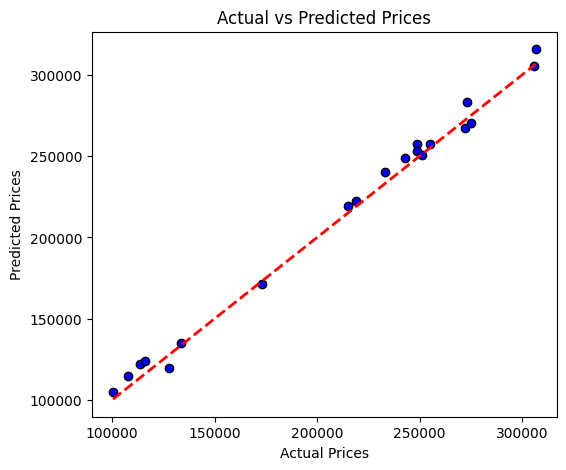

In [15]:
# Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [16]:
## 🧠 5. Interpretation

In [17]:
for feature, coef in zip(X.columns, model.coef_):
    print(f"Every unit increase in {feature} changes Price by approximately {coef:.2f} units.")


Every unit increase in Area changes Price by approximately 121.57 units.
Every unit increase in Bedrooms changes Price by approximately 10411.14 units.
Every unit increase in Age changes Price by approximately -516.68 units.
